In [1062]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Parameters, minimize, fit_report

Importing the data for $4 \lambda=5.6$ as a numpy array

In [1063]:
E=np.zeros((12,90))
T_,E[0],E[1],E[2],E[3],E[4],E[5],E[6],E[7],E[8],E[9],E[10],E[11]=np.loadtxt("/Users/ssajal/Desktop/academic/practical_M.1/ultrafast_transient_grating/data/GaAs_RT_5.6_X.dat",unpack=True)

In [1064]:
B=len(T_)

Averaging of all the array imported and data points for $t=>0$ are collected

In [1065]:
Eavg=np.zeros(B)
for i in range(12):
    Eavg+=E[i]
Eavg/12    
e1=[]
T=[]
for i in range(B):
    if(T_[i]>0):
        T.append(T_[i])
        e1.append(Eavg[i])
T=np.array(T)        
T*=10**(-12)

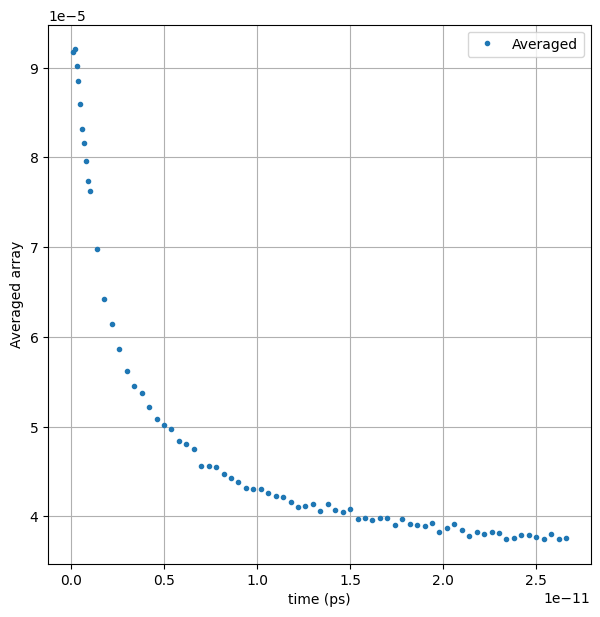

In [1066]:
plt.figure(figsize=(7,7))
plt.plot(T,e1,'.',label="Averaged")
plt.xlabel("time (ps)")
plt.ylabel("Averaged array")
plt.legend()
plt.grid()


Function defined for fitting the data points with the expected functional form, the inbuilt functions used to fit the data points minimizes the error.

In [1067]:
def residual(params, x, data):
    '''Residual function we want to minimize'''
    amplitude = params["A"]
    #
    
    decaytime=params["t1"]
    constant=params["c"]

    model = amplitude*np.exp(-x/decaytime)+ constant # simple linear curve
    return (model - data) 
#######


In [1068]:
params = Parameters()
# choose initial guess as from past reports
params.add("A", value=92*10**(-5))
params.add("t1",value=10**(-12))
params.add("c",value=4*10**(-5))

out = minimize(residual, params, args=(np.array(T),np.array(e1)))

In [1069]:
a = out.params["A"].value
tau=out.params["t1"].value
C=out.params["c"].value

fitted curve with the value of the parameters written in the graph

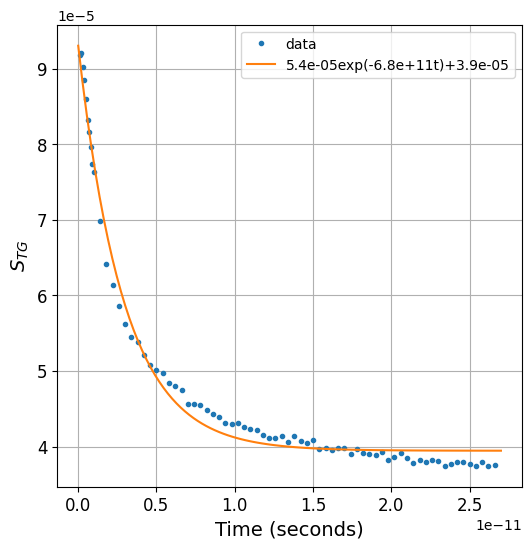

In [1070]:
t=np.linspace(0,27*10**(-12),100)
plt.figure(figsize=(6,6))
plt.plot(T,e1,'.',label='data')
plt.plot(t,a*np.exp(-t/tau)+C,label=f'{a:0.2}exp({-2/tau:0.2}t)+{C:0.2}')#'+{C:0.2}')
plt.legend()
plt.grid()
plt.tick_params(axis='both', which='both', labelsize=12)
plt.xlabel("Time (seconds)", size=14)
plt.ylabel(r"$S_{TG}$", size=14)
plt.savefig("lamda_1.4.png")

Creating array for $D_{a}q^2$ and calculating $q^2$

In [1071]:
Daq=np.zeros(4)
Daq[0]=1/tau
print(Daq)
p=1
# lamdatg = grating width
lamdatg=np.array([1.4*10**-6,0.25*6.5*10**(-6),2*10**(-6),3*10**(-6)])
print(lamdatg)
# qsq = q square
qsq=(2*np.pi/lamdatg)**2
print(qsq)


[3.4187266e+11 0.0000000e+00 0.0000000e+00 0.0000000e+00]
[1.400e-06 1.625e-06 2.000e-06 3.000e-06]
[2.01420498e+13 1.49504067e+13 9.86960440e+12 4.38649084e+12]


In [1072]:
F=np.zeros((10,90))
T1_,F[0],F[1],F[2],F[3],F[4],F[5],F[6],F[7],F[8],F[9]=np.loadtxt("/Users/ssajal/Desktop/academic/practical_M.1/ultrafast_transient_grating/data/GaAs_RT_6.5_X.dat",unpack=True)

In [1073]:
B=len(T1_)

In [1074]:
Eavg1=np.zeros(B)
for i in range(10):
    Eavg1+=F[i]
Eavg1/10
e2=[]
T1=[]
for i in range(B):
    if(T1_[i]>=0.5):
        T1.append(T1_[i])
        e2.append(Eavg1[i])
T1=np.array(T1)        
T1*=10**(-12)

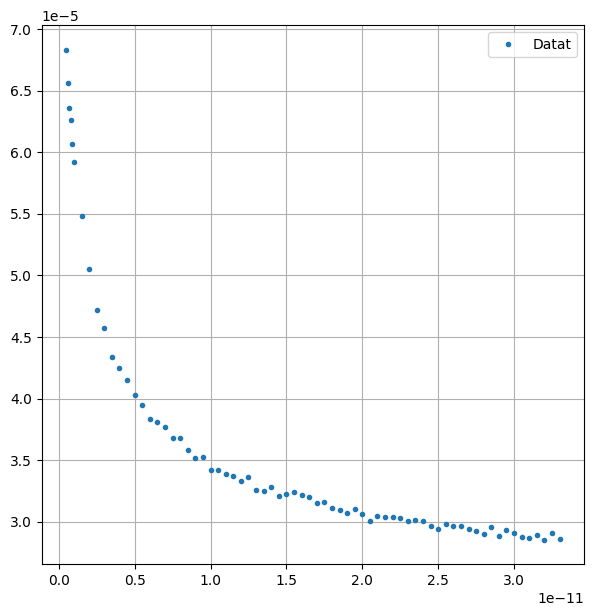

In [1075]:
plt.figure(figsize=(7,7))
plt.plot(T1,e2,'.',label="Datat")
plt.legend()
plt.grid()


In [1076]:
params = Parameters()
# choose initial guess as from past reports
params.add("A", value=9*10**(-5))
params.add("t1",value=10**-12)
params.add("c",value=3*10**(-5))

out = minimize(residual, params, args=(np.array(T1),np.array(e2)))

In [1077]:
a= out.params["A"].value
tau=out.params["t1"].value
C=out.params["c"].value

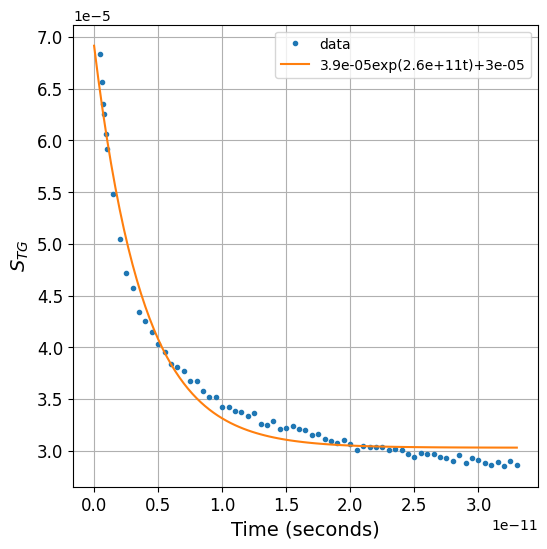

In [1078]:
t=np.linspace(0,33*10**(-12),100)
plt.figure(figsize=(6,6))
plt.plot(T1,e2,'.',label='data')
plt.plot(t,a*np.exp(-t/tau)+C,label=f'{a:0.2}exp({1/tau:0.2}t)+{C:0.2}')
plt.legend()
plt.grid()
plt.tick_params(axis='both', which='both', labelsize=12)
plt.xlabel("Time (seconds)", size=14)
plt.ylabel(r"$S_{TG}$", size=14);
plt.savefig("lamda_1.625.png")

In [1079]:
print(tau)
p=1
Daq[p]=1/tau
print(Daq)

3.820218563209891e-12
[3.41872660e+11 2.61765128e+11 0.00000000e+00 0.00000000e+00]


In [1080]:
G=np.zeros((12,90))
T2_,G[0],G[1],G[2],G[3],G[4],G[5],G[6],G[7],G[8],G[9],G[10],G[11]=np.loadtxt("/Users/ssajal/Desktop/academic/practical_M.1/ultrafast_transient_grating/data/GaAs_RT_8_X.dat",unpack=True)

In [1081]:
B=len(T2_)

In [1082]:
Eavg2=np.zeros(B)
for i in range(12):
    Eavg2+=G[i]
Eavg2/12    
e3=[]
T2=[]
for i in range(B):
    if(T2_[i]>=0):
        T2.append(T2_[i])
        e3.append(Eavg2[i])
T2=np.array(T2)        
T2*=10**(-12)     


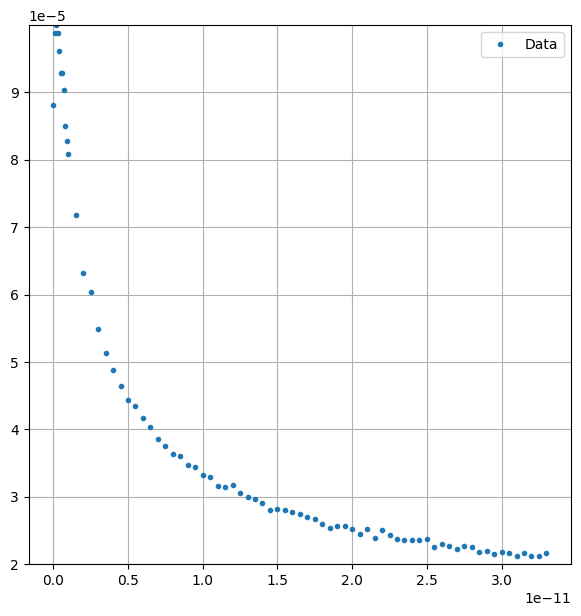

In [1083]:
plt.figure(figsize=(7,7))
plt.plot(T2,e3,'.',label="Data")
plt.ylim(.00002,.00009999)
plt.legend()
plt.grid()


In [1084]:
params = Parameters()
# choose initial guess as from past reports
params.add("A", value=10**(-4))
params.add("t1",value=10**-12)
params.add("c",value=2*10**(-5))

out = minimize(residual, params, args=(np.array(T2),np.array(e3)))

In [1085]:
a, a_err = out.params["A"].value, np.sqrt(out.covar[0][0])
tau,tau_err=out.params["t1"].value, np.sqrt(out.covar[1][1])
C,C_err=out.params["c"].value,np.sqrt(out.covar[2][2])

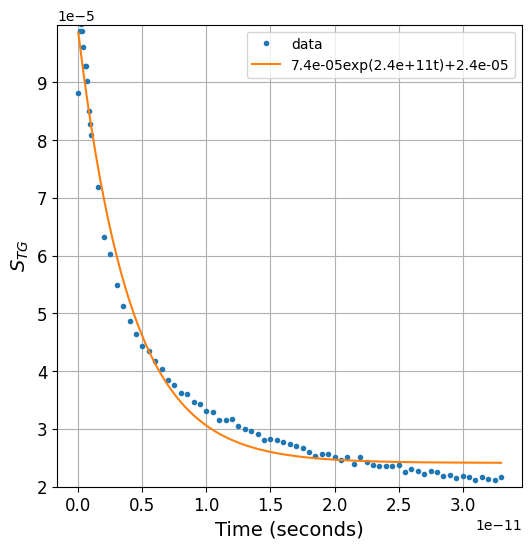

In [1086]:
t=np.linspace(0,33*10**(-12),100)
plt.figure(figsize=(6,6))
plt.plot(T2,e3,'.',label='data')
plt.plot(t,a*np.exp(-t/tau)+C,label=f'{a:0.2}exp({1/tau:0.2}t)+{C:0.2}')#'+{C:0.2}')
plt.legend()
plt.grid()
plt.tick_params(axis='both', which='both', labelsize=12)
plt.ylim(.00002,.00009999)
plt.xlabel("Time (seconds)", size=14)
plt.ylabel(r"$S_{TG}$", size=14);
plt.savefig("lamda_2.png")

In [1087]:
print(tau,tau_err)
p=2
Daq[p]=1/tau
print(Daq)

4.089485746912034e-12 1.5909867525636694e-13
[3.41872660e+11 2.61765128e+11 2.44529523e+11 0.00000000e+00]


In [1088]:
H=np.zeros((10,96))
T3_,H[0],H[1],H[2],H[3],H[4],H[5],H[6],H[7],H[8],H[9]=np.loadtxt("/Users/ssajal/Desktop/academic/practical_M.1/ultrafast_transient_grating/data/GaAs_RT_12_X.dat",unpack=True)

In [1089]:
B=len(T3_)

In [1090]:
len(H[0])

96

In [1091]:
Eavg3=np.zeros(B)
for i in range(10):
    Eavg3+=H[i]
Eavg/10    
e4=[]
T3=[]
for i in range(B):
    if(T3_[i]>=0):
        T3.append(T3_[i])
        e4.append(Eavg3[i])
T3=np.array(T3)        
T3*=10**(-12)


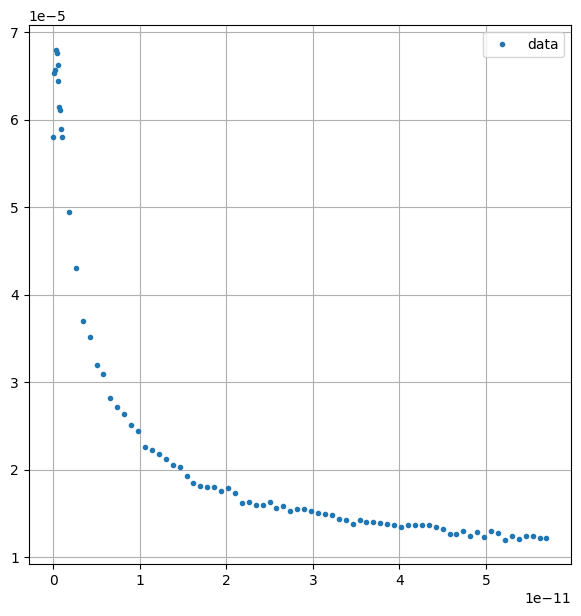

In [1092]:
plt.figure(figsize=(7,7))
plt.plot(T3,e4,'.',label="data")
plt.legend()
plt.grid()


In [1093]:
params = Parameters()
# choose initial guess as from past reports
params.add("A", value=7*10**(-5))
params.add("t1",value=0.5*10**-12)
params.add("c",value=10**(-5))

out = minimize(residual, params, args=(np.array(T3),np.array(e4)))

In [1094]:
a, a_err = out.params["A"].value, np.sqrt(out.covar[0][0])
tau,tau_err=out.params["t1"].value, np.sqrt(out.covar[1][1])
C,C_err=out.params["c"].value,np.sqrt(out.covar[2][2])

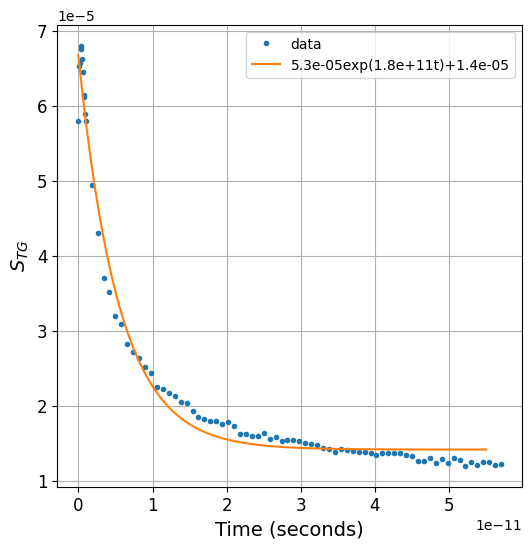

In [1095]:
t=np.linspace(0,55*10**(-12),100)
plt.figure(figsize=(6,6))
plt.plot(T3,e4,'.',label='data')
plt.plot(t,a*np.exp(-t/tau)+C,label=f'{a:0.2}exp({1/tau:0.2}t)+{C:0.2}')#'+{C:0.2}')
plt.legend()
plt.grid()
plt.tick_params(axis='both', which='both', labelsize=12)
plt.xlabel("Time (seconds)", size=14)
plt.ylabel(r"$S_{TG}$", size=14);
plt.savefig("lamda_3.png")

In [1096]:
print(tau,tau_err)
p=3
Daq[p]=1/tau
print(Daq)

5.469247881140789e-12 2.1967336399243687e-13
[3.41872660e+11 2.61765128e+11 2.44529523e+11 1.82840497e+11]


This portion fits the $D_{a}q^2$ vs $q^{2}$ as a linear curve

In [1097]:
def residual1(params, x, data):
    '''Residual function we want to minimize'''
    slope = params["a"]
    intercept = params["b"]

    model = slope * x + intercept  # simple linear curve
    return (model - data)

In [1098]:
params = Parameters()
# choose initial guess as from past reports
params.add("a", value=1*10**-3)
params.add("b", value=10**11)        
out = minimize(residual1, params, args=(np.array(qsq),np.array(Daq))) 

In [1099]:
a, a_err = out.params["a"].value, np.sqrt(out.covar[0][0])
b, b_err = out.params["b"].value, np.sqrt(out.covar[1][1])

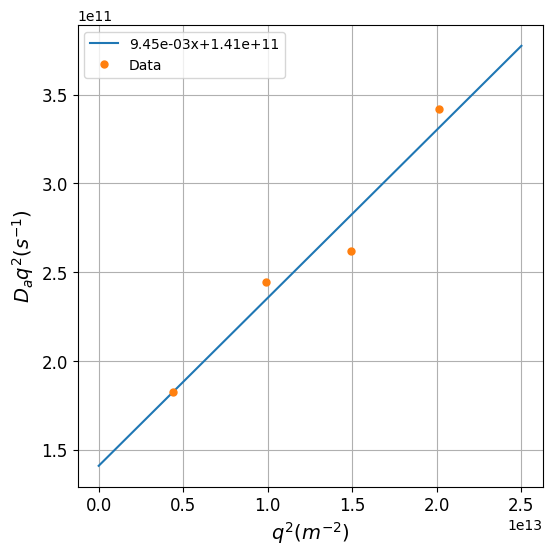

In [1100]:
plt.figure(figsize=(6,6))
plt.grid()
plt.xlabel('$q^2(m^{-2})$', size=14)
plt.ylabel('$D_{a}q^2(s^{-1})$', size=14)
plt.plot(np.linspace(0,2.5*10**13,100),a*np.linspace(0,2.5*10**13,100)+b,label=f'{a:0.2e}x+{b:0.2e}')
plt.plot(qsq,Daq,'.',ms=10,label='Data')
plt.tick_params(axis='both', which='both', labelsize=12)
plt.legend();
plt.savefig("slope.png")

In [1101]:
Daq
# slope = D_a
print(a)
# recombination time = 1/t_rec = 1/b'
print(1/b)

0.009451213078481131
7.084609872465031e-12


In [1102]:
ECT=np.array(qsq*9.45*10**(-3))
print(ECT)
print(np.array(qsq*a))

[1.90342371e+11 1.41281343e+11 9.32677616e+10 4.14523385e+10]
[1.90366804e+11 1.41299479e+11 9.32797342e+10 4.14576596e+10]


In [1103]:
qsq

array([2.01420498e+13, 1.49504067e+13, 9.86960440e+12, 4.38649084e+12])

In [1104]:
ECT

array([1.90342371e+11, 1.41281343e+11, 9.32677616e+10, 4.14523385e+10])

In [1105]:
print(1/ECT)

[5.25369100e-12 7.07807541e-12 1.07218184e-11 2.41240913e-11]
